In [1]:
import tweepy
import wordcloud
from textblob import TextBlob
import re
import spacy

In [2]:
api_key = "btZzNAPzYRVauFxGZp0ylCiWq"
api_secret = "uAatv7uLAqG1nkgad180vtaw1P2aTp4hH7QOrsDtZa3R2d97Cv"
access_token = "857530568-NtMnTwJbeAUsBJ75akfvUlFyU8WSEvoXxxZOeJqy"
access_token_secret = "TBV1OofYaYVBR20T7lLUQplVqzbkVFOgmRGlF2OG9nn3e"

In [3]:
auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [4]:
tweets = api.search(q="Reliance jio",count=20,tweet_mode="extended")

In [5]:
sents = []
clean_tweets = []

for tw in tweets:
    tw = tw.full_text
    tw = re.sub("@[a-zA-Z0-9:_]+","",tw) # remove handles
    tw = re.sub("#","",tw) # remove #
    tw = re.sub("RT","",tw)
    tw = re.sub("http[a-zA-Z0-9._\/:\%]+","",tw) # to remove urls
    tw = tw.strip() # to remove whitespace from end and begining of text
    print(tw)
    if len(tw)>10:
        tw = TextBlob(tw)
        if tw.detect_language()!='en':
            tw = tw.translate(to='en')
            print(tw.raw)
        clean_tweets.append(tw.raw)
        if tw.sentiment.polarity>+0.1:
            print("Positive")
            sents.append("Positive")
        elif tw.sentiment.polarity<-0.1:
            print("Negative")
            sents.append("Negative")
        else:
            print("Neutral")
            sents.append("Neutral")
        print("****************************")
        print("\n")

Get the latest TCL L7 Jio exclusive smartphone at a price of just ‚Çπ4 999*/- from Reliance Digital. Shop now from any o‚Ä¶
Positive
****************************


üò∂2014 general election was 'rigged' by BJP, claims cyber expert
Neutral
****************************


reliance jio hotspot is giving very low speed despite being a corporate customer . Which means every month reliance jio is earning huge money as fixed revenue and in return it is not giving promised speed . It‚Äôs a breach of agreement by earning through unfair means
Neutral
****************************


reliance hot spot is giving this low speed at kharghar . Reliance jio is taking money as usual and not giving its service . In a way cheating to customer
Neutral
****************************


Getting rid of Jio and other reliance products if this takes place. 

FYI
Negative
****************************


Reliance Jio ‡§ï‡§æ ‡§∂‡§æ‡§®‡§¶‡§æ‡§∞ ‡§ë‡§´‡§∞, ‡§è‡§ï ‡§™‡•ç‡§≤‡§æ‡§® ‡§ï‡•ã 4 ‡§≤‡•ã‡§ó ‡§ï‡•ã ‡§Æ‡§ø‡§≤‡•á‡§ó‡§

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


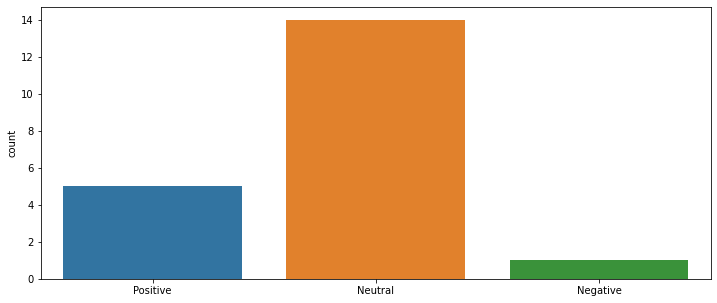

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(sents)
plt.show()

# Wordcloud analysis

In [7]:
df = pd.DataFrame({"tweets":clean_tweets,"sents":sents})
df.head()

tweets     sents
0  Get the latest TCL L7 Jio exclusive smartphone...  Positive
1  üò∂2014 general election was 'rigged' by BJP, cl...   Neutral
2  reliance jio hotspot is giving very low speed ...   Neutral
3  reliance hot spot is giving this low speed at ...   Neutral
4  Getting rid of Jio and other reliance products...  Negative

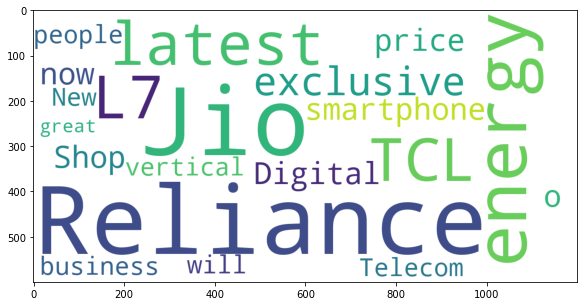

In [8]:
ptweets = df.tweets[df.sents=="Positive"].tolist()

wd = wordcloud.WordCloud(background_color='white',max_words=20,width=1200,height=600).generate_from_text(" ".join(ptweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

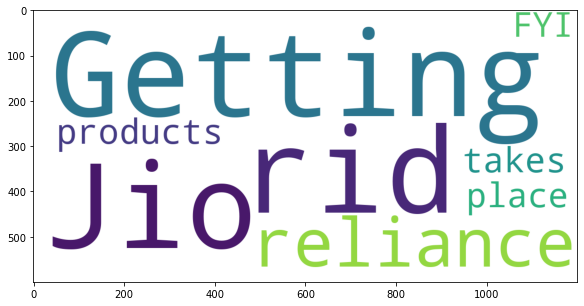

In [9]:
ntweets = df.tweets[df.sents=="Negative"].tolist()

wd = wordcloud.WordCloud(background_color='white',max_words=20,width=1200,height=600).generate_from_text(" ".join(ntweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

# NER Analysis

In [12]:
for tw in ptweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

In [13]:
for tw in ntweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

# Text analytics with textblob

In [14]:
data = TextBlob("Hello Everyone, Hope you are enjoying Machine Learning.")

In [15]:
data.detect_language()

'en'

In [16]:
data.translate(to='hi')

TextBlob("‡§∏‡§≠‡•Ä ‡§ï‡•ã ‡§®‡§Æ‡§∏‡•ç‡§ï‡§æ‡§∞, ‡§Ü‡§∂‡§æ ‡§π‡•à ‡§ï‡§ø ‡§Ü‡§™ ‡§Æ‡§∂‡•Ä‡§® ‡§≤‡§∞‡•ç‡§®‡§ø‡§Ç‡§ó ‡§ï‡§æ ‡§Ü‡§®‡§Ç‡§¶ ‡§≤‡•á ‡§∞‡§π‡•á ‡§π‡•ã‡§Ç‡§ó‡•á‡•§")

In [17]:
data.translate(to='mr')

TextBlob("‡§™‡•ç‡§∞‡§§‡•ç‡§Ø‡•á‡§ï‡§æ‡§∏ ‡§Ö‡§≠‡§ø‡§µ‡§æ‡§¶‡§®, ‡§Ü‡§∂‡§æ ‡§Ü‡§π‡•á ‡§ï‡•Ä ‡§Ü‡§™‡§£ ‡§Æ‡§∂‡•Ä‡§® ‡§≤‡§∞‡•ç‡§®‡§ø‡§Ç‡§ó‡§ö‡§æ ‡§Ü‡§®‡§Ç‡§¶ ‡§ò‡•á‡§§ ‡§Ö‡§∏‡§æ‡§≤.")

In [18]:
data.translate(to='te')

TextBlob("‡∞Ö‡∞Ç‡∞¶‡∞∞‡∞ø‡∞ï‡±Ä ‡∞π‡∞≤‡±ã, ‡∞Æ‡±Ä‡∞∞‡±Å ‡∞Ø‡∞Ç‡∞§‡±ç‡∞∞ ‡∞Ö‡∞≠‡±ç‡∞Ø‡∞æ‡∞∏‡∞æ‡∞®‡±ç‡∞®‡∞ø ‡∞Ü‡∞®‡∞Ç‡∞¶‡∞ø‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡∞®‡∞ø ‡∞Ü‡∞∂‡∞ø‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞®‡±Å.")

In [19]:
data.translate(to='ka')

TextBlob("·Éß·Éï·Éî·Éö·Éê·É° ·Éõ·Éù·Éí·Éî·É°·Éê·Éö·Éõ·Éî·Éë·Éò·Éó, ·Éò·Éõ·Éî·Éì·Éò·Éê ·Éí·É°·Éò·Éê·Éõ·Éù·Éï·Éú·Éî·Éë·Éó ·Éõ·Éê·Éú·É•·Éê·Éú·É£·É†·Éò ·É°·É¨·Éê·Éï·Éö·Éî·Éë·Éê.")

In [20]:
data.translate(to='bn')

TextBlob("‡¶∏‡¶¨‡¶æ‡¶á‡¶ï‡ßá ‡¶π‡ßç‡¶Ø‡¶æ‡¶≤‡ßã, ‡¶Ü‡¶∂‡¶æ ‡¶ï‡¶∞‡¶ø ‡¶Ü‡¶™‡¶®‡¶ø ‡¶Æ‡ßá‡¶∂‡¶ø‡¶® ‡¶≤‡¶æ‡¶∞‡ßç‡¶®‡¶ø‡¶Ç ‡¶â‡¶™‡¶≠‡ßã‡¶ó ‡¶ï‡¶∞‡¶õ‡ßá‡¶®‡•§")

In [21]:
data.translate(to='ta')

TextBlob("‡ÆÖ‡Æ©‡Øà‡Æµ‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æµ‡Æ£‡Æï‡Øç‡Æï‡ÆÆ‡Øç, ‡Æ®‡ØÄ‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æá‡ÆØ‡Æ®‡Øç‡Æ§‡Æø‡Æ∞ ‡Æï‡Æ±‡Øç‡Æ±‡Æ≤‡Øà ‡ÆÖ‡Æ©‡ØÅ‡Æ™‡Æµ‡Æø‡Æï‡Øç‡Æï‡Æø‡Æ±‡ØÄ‡Æ∞‡Øç‡Æï‡Æ≥‡Øç ‡Æé‡Æ©‡Øç‡Æ±‡ØÅ ‡Æ®‡ÆÆ‡Øç‡Æ™‡ØÅ‡Æï‡Æø‡Æ±‡Øá‡Æ©‡Øç.")

In [22]:
data = TextBlob("the movie was amazing and i love it")
data.sentiment.polarity

0.55

In [23]:
data = TextBlob("the movie was bad and i hate it")
data.sentiment.polarity

-0.75

   # NER - Named Entity Recognition

In [11]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("John purchased a watch in Mumbai while working with State Bank of India and gifted to Cherry Kriston last monday.")


displacy.render(doc,style='ent',jupyter=True)

In [24]:
nlp?